# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 5 of Set 1 | charters towers
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | lamu
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | grand river south east
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | juneau
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | bambous virieux
Process

Processing Record 37 of Set 4 | marsa matruh
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | port macquarie
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | eyl
Processing Record 42 of Set 4 | san juan
Processing Record 43 of Set 4 | kavalerovo
Processing Record 44 of Set 4 | cobija
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | sao pedro do sul
Processing Record 48 of Set 4 | nouadhibou
City not found. Skipping...
Processing Record 49 of Set 4 | dauphin
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | sidi qasim
Processing Record 3 of Set 5 | mys shmidta
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | mareeba
Processing Record 6 of Set 5 | fergus falls
Processing Record 7 of Set 5 | buala
Processing Record 8 of Set 5 | pendleton
Processing Record 9 of Set 5 | 

Processing Record 29 of Set 8 | san pedro
Processing Record 30 of Set 8 | waupun
Processing Record 31 of Set 8 | airai
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | krasnyy yar
Processing Record 34 of Set 8 | sayyan
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | bosaso
Processing Record 37 of Set 8 | teya
Processing Record 38 of Set 8 | dmytrivka
Processing Record 39 of Set 8 | dicabisagan
Processing Record 40 of Set 8 | finnsnes
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | stykkisholmur
Processing Record 43 of Set 8 | ust-nera
Processing Record 44 of Set 8 | waddan
Processing Record 45 of Set 8 | sept-iles
City not found. Skipping...
Processing Record 46 of Set 8 | priiskovyy
Processing Record 47 of Set 8 | sena madureira
Processing Record 48 of Set 8 | padilla
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 8 | hailey
Processing Record 1 of Set 9 | isla mujeres
Pr

Processing Record 14 of Set 12 | camalu
Processing Record 15 of Set 12 | baiyin
Processing Record 16 of Set 12 | biograd na moru
Processing Record 17 of Set 12 | port blair
Processing Record 18 of Set 12 | shenzhen
Processing Record 19 of Set 12 | plouzane
Processing Record 20 of Set 12 | eenhana
City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weatherpy_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

In [6]:
# Display count of weather data values 
weather_data.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,27,AU,1566870983,44,-33.64,115.35,62.01,14.63
1,east london,4,UG,1566870983,95,3.43,31.70,63.79,2.26
2,provideniya,90,RU,1566871280,93,64.42,-173.23,51.80,13.42
3,port elizabeth,100,CD,1566870696,55,-7.04,29.76,67.57,1.50
4,charters towers,90,US,1566871030,100,38.57,-83.43,68.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

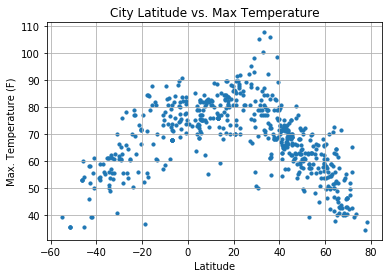

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

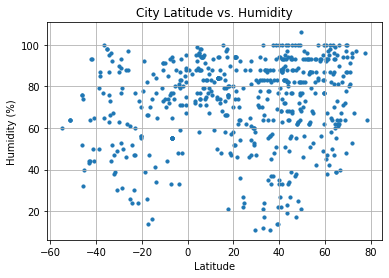

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

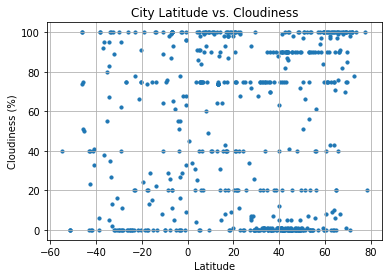

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

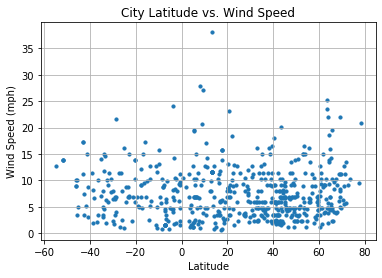

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()